**CASO PRACTICO 2 -**
**Polynomial regression**

"Polynomial regression" es una forma de análisis de regresión que consiste en ajustar una relacion curva que explique el comportamiento de una serie de datos.

En este caso de uso partiremos de un dataframe que nos indica segun la cantidad de ventas, la materia prima por mes requerida por una empresa productiva. Nuestro objetivo es proyectar las ventas del mes 10 para poder gestionar la compra de la materia prima requerida para la producción. 

In [ ]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = 0
df = pd.DataFrame()

# Definimos las columnas.
df['VENTAS'] = None
df['MP1'] = None
df['MP2'] = None

# Añadimos las filas al dataset.
df.loc[1] = [50, 500, 160]
df.loc[2] = [55, 555, 180]
df.loc[3] = [75, 758, 240]
df.loc[4] = [150, 1512, 480]
df.loc[5] = [320, 3220, 1010]
df.loc[6] = [500, 5400, 1620]
df.loc[7] = [510, 5390, 1640]
df.loc[8] = [520, 5500, 1700]
df.loc[9] = [345, 3600, 1100]

print(df)

  VENTAS   MP1   MP2
1     50   500   160
2     55   555   180
3     75   758   240
4    150  1512   480
5    320  3220  1010
6    500  5400  1620
7    510  5390  1640
8    520  5500  1700
9    345  3600  1100


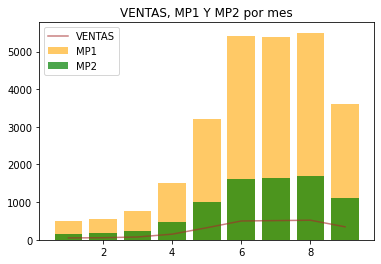

In [ ]:
# Realizamos una primera aproximacion al dataset.
plt.title('VENTAS, MP1 Y MP2 por mes')
plt.plot(df.index, df['VENTAS'], color='brown', alpha=0.6)
plt.bar(df.index, df['MP1'], color='orange', alpha=0.6)
plt.bar(df.index, df['MP2'], color='green', alpha=0.7)
plt.legend(['VENTAS','MP1','MP2'])


Podemos notar que existe una conducta estacional en el consumo del producto comercializado. Como primera aproximación, ya podemos vislumbrar que no es posible aproximar el comportamiento de los datos a través de una regresión lineal. 

In [ ]:
# Definimos el modelo polynomial que utilizaremos.
# Es importante en este punto la definicion del parametro "PolynomialFeatures", ya que este hace alusion al grado de la polinomial y tendra un impacto
# significativo en la aproximacion.

poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


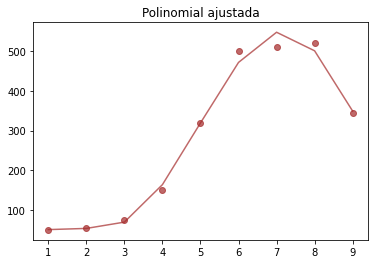

In [ ]:
# Asignamos a "x" e "y" los valores correspondientes.
x = df.index
y = df['VENTAS']

# Ejecutamos el modelo.
xfit = df.index
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

# Graficamos resultante.
plt.title('Polinomial ajustada')
plt.scatter(x, y, color='brown', alpha=0.7)
plt.plot(xfit, yfit, color='brown', alpha=0.7);

Vemos como una polinomial de grado 5 resulta bastante precisa a la hora de explicar el comportamiento del volumen de las ventas.

In [ ]:
def poly_funcion ( x ):
  """Cantidad de ventas por mes. 
    @PARAM x = numero de mes
  """
  return poly_model.predict([[x]])[0]

# Una vez definida la funcion puedo predecir la cantidad de ventas que voy a tener en el mes posterior.
MES_PREDICT = 10
VENTAS_MES_10 = poly_funcion(MES_PREDICT)
VENTAS_MES_10

210.41666666625554

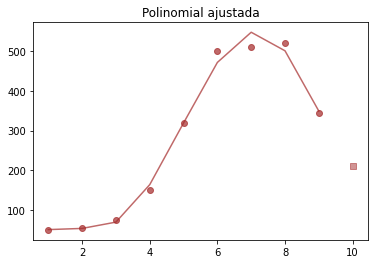

In [ ]:
# Graficamos el punto obtenido junto al modelo, podemos notar como se ajusta a la tendencia bajista.
plt.title('Polinomial ajustada')
plt.scatter(x, y, color='brown', alpha=0.7)
plt.scatter(10, VENTAS_MES_10, color='brown', alpha=0.5, marker = ',')
plt.plot(xfit, yfit, color='brown', alpha=0.7);

In [ ]:
# A su vez, me permite conocer los valores intermedios entre los puntos obtenidos, esto podria ser importante para llevar adelante un plan de compras semanal de 
# materia prima
poly_funcion(8.25)

469.81601030366755

Una vez obtenida la cantidad de ventas que realizaríamos en el mes 10, solo nos queda estimar la materia prima requerida. Con lo cual, tenemos que obtener la relación que existe en las materias primas y las ventas. 

Sin embargo, sabemos que un proceso productivo puede percibir cierta variación de requerimientos de materia prima y es parte de nuestro trabajo considerarlo.

In [ ]:
# Para saber esto primero tenemos que conocer la relacion que existe entre las ventas y la MP1 y MP2.
df['MP1/VENTAS'] =  df['MP1'] / df['VENTAS']
df['MP2/VENTAS'] =  df['MP2'] / df['VENTAS']

Text(0.5, 1.0, 'MP2/VENTAS')

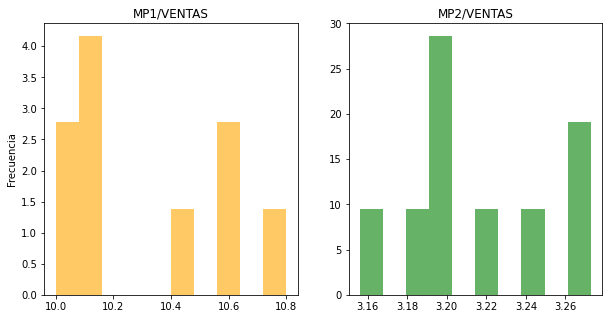

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].hist(df['MP1/VENTAS'], bins=10, density=True, alpha=0.6, color='orange')
axs[0].set_title('MP1/VENTAS')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(df['MP2/VENTAS'], bins=10, density=True, alpha=0.6, color='green')
axs[1].set_title('MP2/VENTAS')

In [ ]:
# En este caso, debido a que la variacion es pequeña, utilizamos el max para asegurarnos que vamos a tener el stock necesario.
# Sin embargo, podria utilizarce tambien median o median_high segun las caracteristicas de adquisicion de la materia prima.
MP1_VENTAS = max(df['MP1/VENTAS'])
MP2_VENTAS = max(df['MP2/VENTAS'])

In [ ]:
# Cantidad de MP1 necesaria.
MP1_MES_10 = VENTAS_MES_10 * MP1_VENTAS
MP1_MES_10

2272.49999999556

In [ ]:
# Cantidad de MP2 necesaria.
MP2_MES_10 = VENTAS_MES_10 * MP2_VENTAS
MP2_MES_10

688.6363636350181

<BarContainer object of 1 artists>

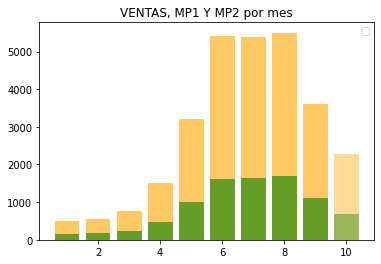

In [ ]:
# Grafico de materias primas con el nuevo mes.
plt.legend(['MP1','MP2'])
plt.title('VENTAS, MP1 Y MP2 por mes')
plt.bar(df.index, df['MP1'], color='orange', alpha=0.6)
plt.bar(df.index, df['MP2'], color='green', alpha=0.6)
plt.bar(MES_PREDICT, MP1_MES_10, color='orange', alpha=0.4)
plt.bar(MES_PREDICT, MP2_MES_10, color='green', alpha=0.4)

**Conclusión**

Nuestro modelo nos permite predecir la cantidad de ventas que se realizaran en los meses posteriores u momentos intermedios. La complejidad del caso radica en el ajuste del modelo polinomial. 

Conocer con exactitud la cantidad de materia prima requerida nos permite mejorar la planificación y evitar el desabastecimiento. Además, los costos bajan al poseer menos inventario inmovilizado.

¿Quieres conocer más? Conoce la bibliografía utilizada:

* https://jakevdp.github.io/PythonDataScienceHandbook/index.html
* https://www.w3schools.com/python/python_ml_polynomial_regression.asp
